In [1]:
import pandas as pd
import numpy as np
from glob import glob
from IPython.display import HTML, display
from data_mani.visu import *
from prediction.functions import *

In [2]:
PREDICTION_MODEL = ['logit', 'ridge', 'lasso', 'enet', 'random_forest', 'lgb', 'nn3']
FS_METHODS = ['all', 'sfi', 'mdi', 'mda', 'granger', 'huang', 'IAMB', 'MMMB']
TICKER_NAMES = ['SPX Index', 'CCMP Index', 'RTY Index', 'SPX Basic Materials', 'SPX Communications',
                'SPX Consumer Cyclical', 'SPX Consumer Non cyclical', 'SPX Energy', 'SPX Financial',
                'SPX Industrial', 'SPX Technology', 'SPX Utilities']
TITLE = 'OOS Cummulative Returns for each Feature Selection Method given a Prediction Model'
BENCHMARK_NAME = 'return_direction'
METRIC_NAME = 'auc'

# Main reference

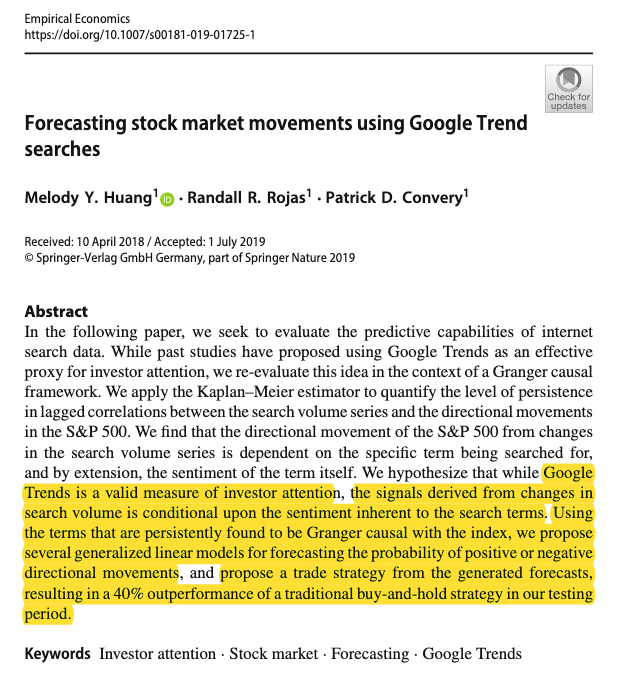

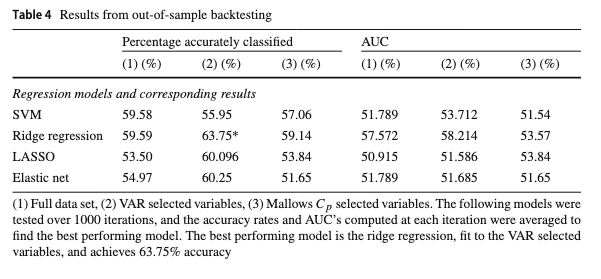

# Our models


## Feature Selection

> 1. All

> 2. Mean decrease impurity (random forest based) - MDI

> 3. Mean decrease accuracy (oos loss of performance; class based) - MDA

> 4. Single feature importance (oos individual feature; reg based) - SFI

> 5. Grenger causality - GRANGER

> 6. Granger causality + Logit - HUANG

> 7. Incremental association Markov boundary - IAMB

> 8. Max-Min Markov boundary - MMMB


## Prediction Models

> 1. Logit

> 2. Ridge regression

> 3. Lasso regression

> 4. Elastic net regression

> 5. Random Forest

> 6. Gradient Boosting

> 7. LSTM neural network (three layer)

## Prediction Setup

> 0. Sample from '2005-01-03' to '2020-12-31'

> 1. Feature selection: '2005-01-03' to '2012-07-03'

> 2. Forecasting: '2012-07-04' to '2020-12-31'

>> a. Random Search

>> b. Predict next year

>> c. Increase sample

# Aggregate prediction results

In [3]:
benchmarks = glob('data/indices/*.csv')
bench_list = []
for b in benchmarks:
    ticker = b.replace('data/indices/', '').replace('.csv', '')
    bench_ret_df = pd.read_csv(b)[3:]
    bench_ret_df.columns = ['date', 'return']
    bench_ret_df = bench_ret_df.melt('date')
    bench_ret_df['model'] = bench_ret_df['ticker'] = ticker
    bench_ret_df['fs'] = 'raw'

    bench_list.append(bench_ret_df)
benchmark_df = pd.concat(bench_list, axis=0)
benchmark_df['value'] = benchmark_df['value'].astype(float)

In [4]:
oos_melt_predictions_df, oos_melt_benchmark_df, oos_melt_auc_df = aggregate_prediction_results(prediction_models=PREDICTION_MODEL,
                                                                                               fs_models=FS_METHODS,
                                                                                               evaluation_start_date='2012-07-03',
                                                                                               evaluation_end_date='2020-12-31',
                                                                                               ticker_names=TICKER_NAMES,
                                                                                               metric_name=METRIC_NAME,
                                                                                               tag='oos',
                                                                                               benchmark_name=BENCHMARK_NAME)

/Users/dcuoliveira/Documents/Daniel/causal_feature/src/prediction/functions.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  benchmark_df['model'] = benchmark_df['ticker']
/Users/dcuoliveira/Documents/Daniel/causal_feature/src/prediction/functions.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  benchmark_df['fs'] = 'raw'


In [5]:
is_melt_predictions_df, is_melt_benchmark_df, is_melt_auc_df = aggregate_prediction_results(prediction_models=PREDICTION_MODEL,
                                                                                            fs_models=FS_METHODS,
                                                                                            evaluation_start_date='2005-01-03',
                                                                                            evaluation_end_date='2012-07-03',
                                                                                            ticker_names=TICKER_NAMES,
                                                                                            metric_name=METRIC_NAME,
                                                                                            tag='is',
                                                                                            benchmark_name=BENCHMARK_NAME)

/Users/dcuoliveira/Documents/Daniel/causal_feature/src/prediction/functions.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  benchmark_df['model'] = benchmark_df['ticker']
/Users/dcuoliveira/Documents/Daniel/causal_feature/src/prediction/functions.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  benchmark_df['fs'] = 'raw'


In [6]:
oos_pred_ret_df, oos_pred_pos_df = gen_strat_positions_and_ret_from_pred(predictions_df=oos_melt_predictions_df,
                                                                         class_threshold=0.5,
                                                                         target_asset_returns=benchmark_df)

is_pred_ret_df, is_pred_pos_df = gen_strat_positions_and_ret_from_pred(predictions_df=is_melt_predictions_df,
                                                                       class_threshold=0.5,
                                                                       target_asset_returns=benchmark_df)

## AUC

In [7]:
oos_auc_tb, oos_agg_fs_auc_tb, oos_agg_fore_auc_tb = plot_df_to_table(df=oos_melt_auc_df,
                                                                      index=['ticker', 'fs'],
                                                                      columns=['model'],
                                                                      values=['oosauc'],
                                                                      apply_factor_to_table=100)

is_auc_tb, is_agg_fs_auc_tb, is_agg_fore_auc_tb = plot_df_to_table(df=is_melt_auc_df,
                                                                   index=['ticker', 'fs'],
                                                                   columns=['model'],
                                                                   values=['isauc'],
                                                                   apply_factor_to_table=100)

In [8]:
oos_auc_tb.reset_index().melt(['ticker', 'fs']).pivot_table(index=['fs'], columns=['model'], values=['value'], aggfunc='median')

value                                                      
model      enet   lasso     lgb   logit     nn3 random_forest   ridge
fs                                                                   
IAMB     49.545  49.540  49.980  49.540  49.560        49.495  49.535
MMMB     49.155  49.020  49.625  49.145  49.440        49.860  49.150
all      48.995  49.660  50.100  49.675  49.790        49.755  49.690
granger  49.525  49.570  49.905  49.630  49.990        49.515  49.615
huang    49.235  49.320  50.090  49.245  50.355        49.745  49.195
mda      49.235  50.315  49.885  49.430  49.405        49.755  49.330
mdi      49.940  51.085  49.845  50.455  49.575        49.180  50.935
sfi      48.670  48.905  50.105  49.740  48.795        50.140  48.980

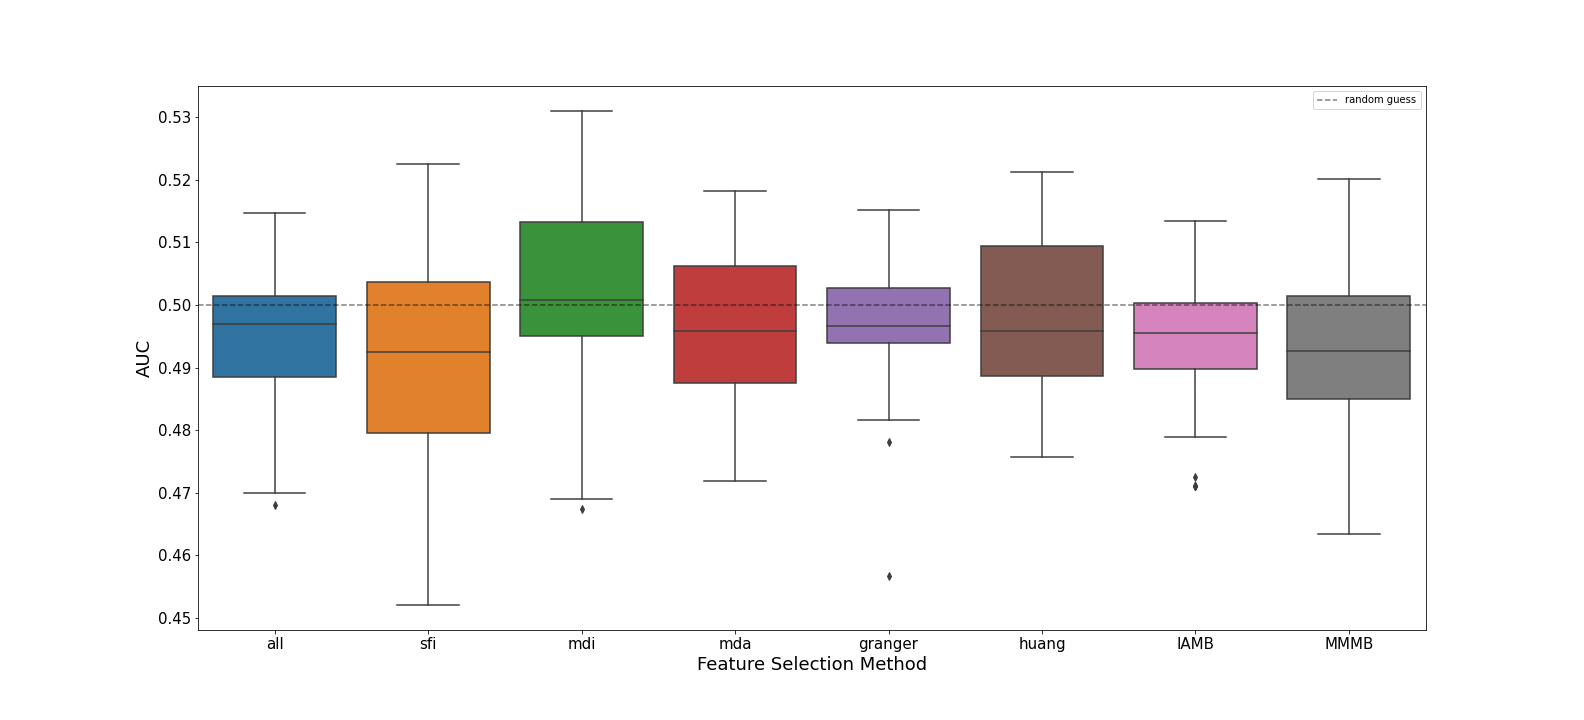

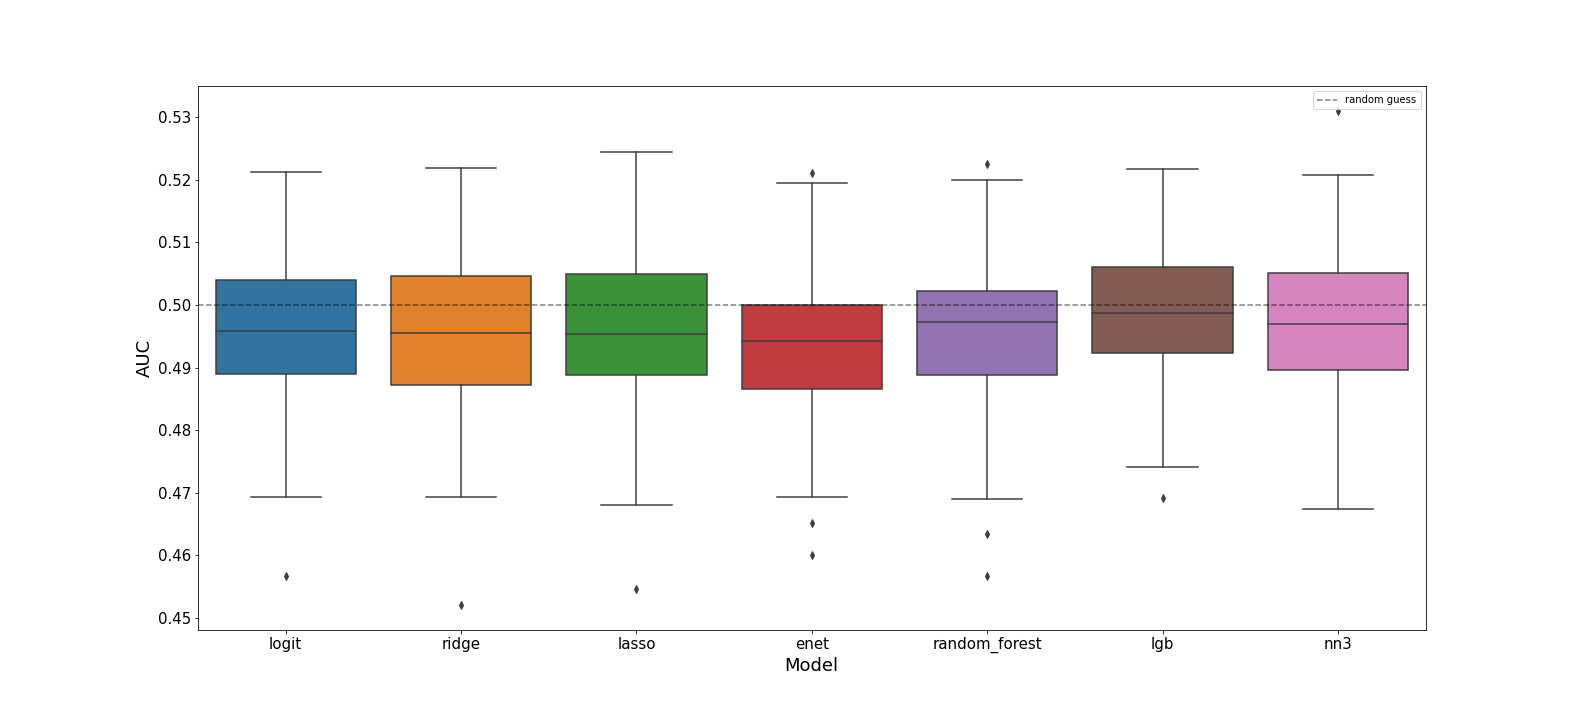

In [9]:
spx_oos_auc_tb = oos_auc_tb.reset_index()
spx_oos_auc_tb = spx_oos_auc_tb.loc[spx_oos_auc_tb['ticker']=='SPX Index']
spx_oos_auc_tb.set_index(['ticker', 'fs'], inplace=True)
spx_oos_auc_tb

model               enet  lasso    lgb  logit    nn3  random_forest  ridge
ticker    fs                                                              
SPX Index IAMB     49.73  49.71  48.65  49.73  49.17          48.13  49.72
          MMMB     46.94  46.94  50.17  46.93  47.37          49.72  46.93
          all      49.30  48.78  49.24  49.77  49.63          48.61  48.85
          granger  51.47  51.50  51.05  51.42  48.94          48.20  51.44
          huang    52.11  52.11  49.68  52.12  52.08          50.06  52.12
          mda      48.14  50.20  50.08  48.85  50.96          49.22  47.97
          mdi      49.99  52.44  49.84  51.40  53.10          48.99  51.88
          sfi      47.96  47.67  48.19  48.41  46.87          50.24  47.63

In [10]:
spx_oos_auc_tb.median(axis=1).sort_values(ascending=False)

ticker     fs     
SPX Index  huang      52.11
           granger    51.42
           mdi        51.40
           IAMB       49.71
           all        49.24
           mda        49.22
           sfi        47.96
           MMMB       46.94
dtype: float64

In [11]:
spx_oos_auc_tb.median(axis=0).sort_values(ascending=False)

model
lasso            49.955
lgb              49.760
logit            49.750
enet             49.515
nn3              49.400
ridge            49.285
random_forest    49.105
dtype: float64

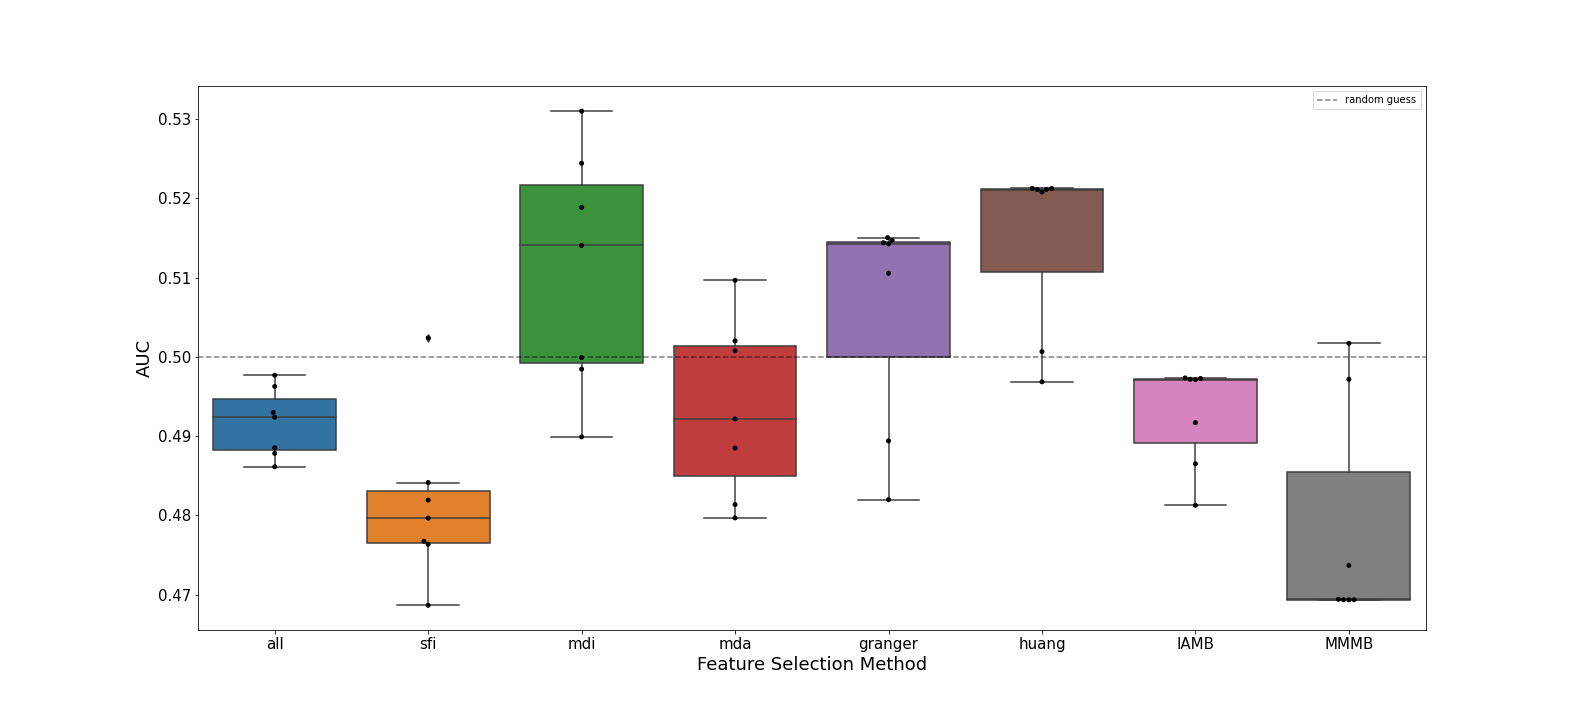

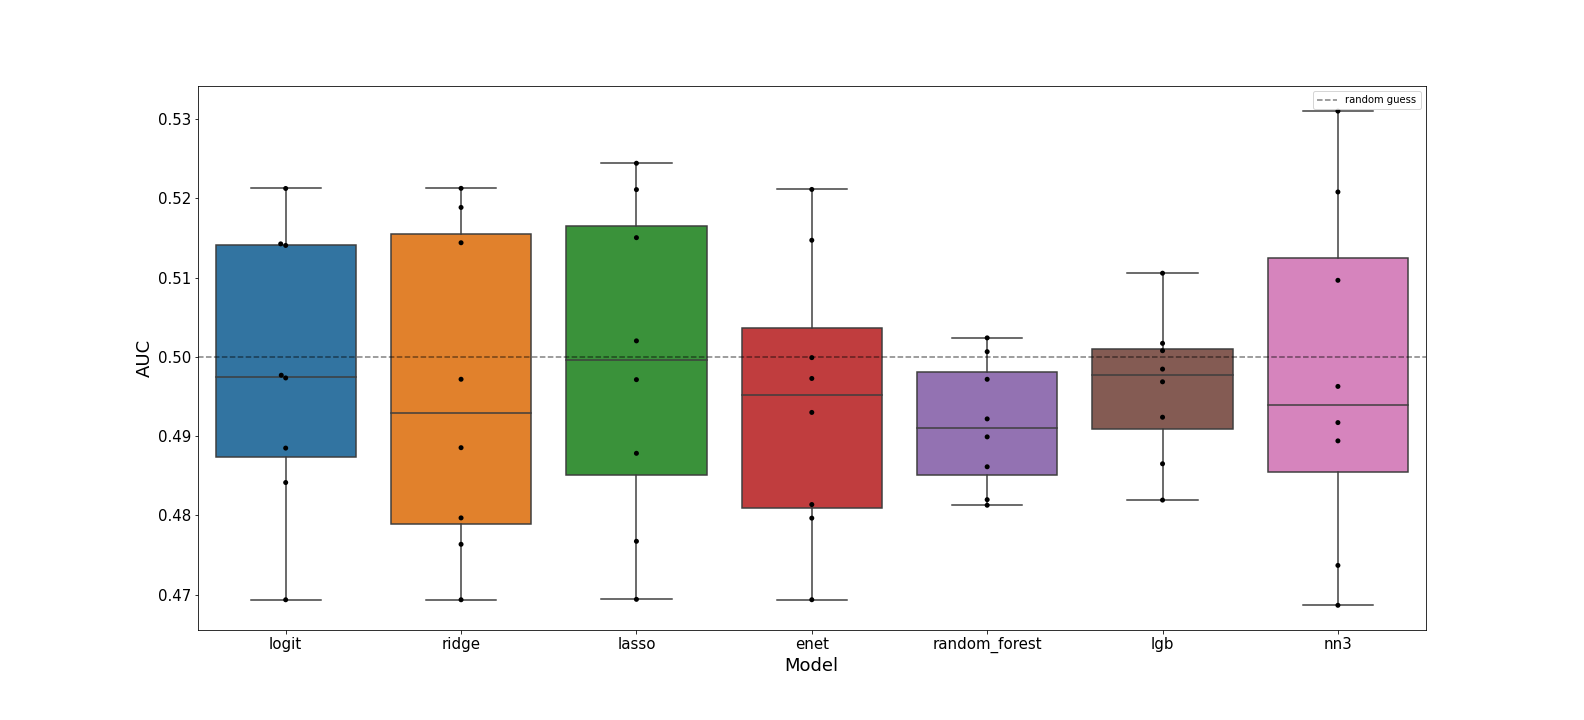

# Cummulative returns

In [52]:
ticker = 'SPX Energy'
summary_oos_pred_ret_df = oos_pred_ret_df.loc[oos_pred_ret_df['ticker']==ticker]
summary_benchmark_df = benchmark_df.loc[benchmark_df['ticker']==ticker]

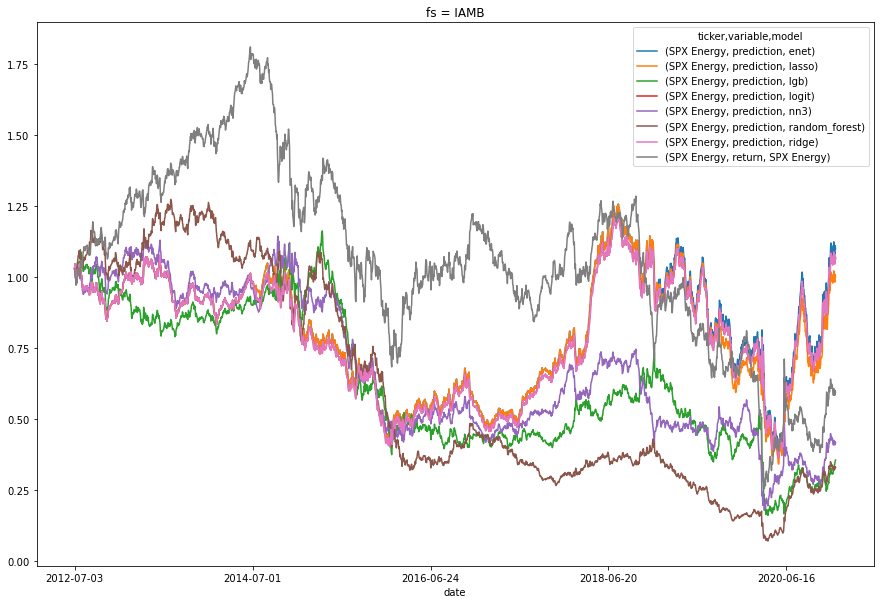

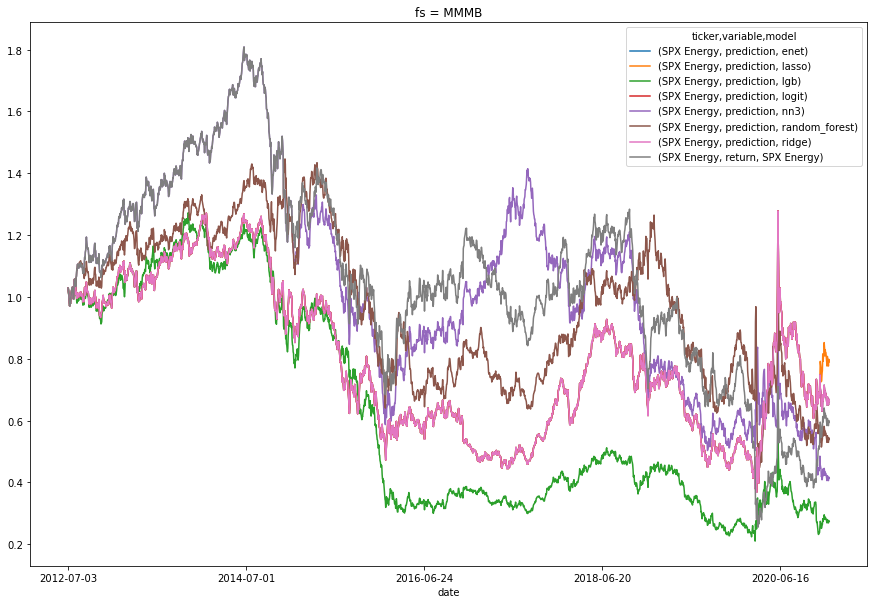

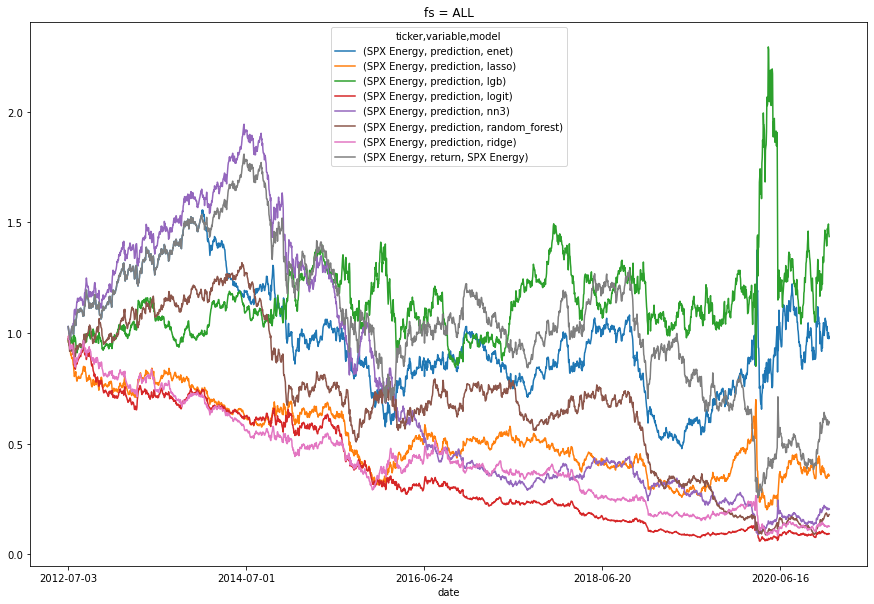

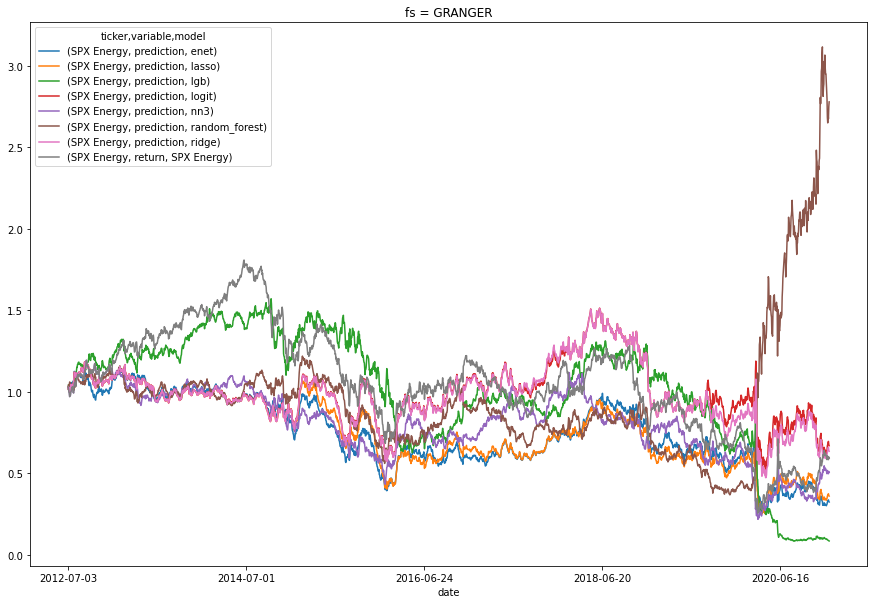

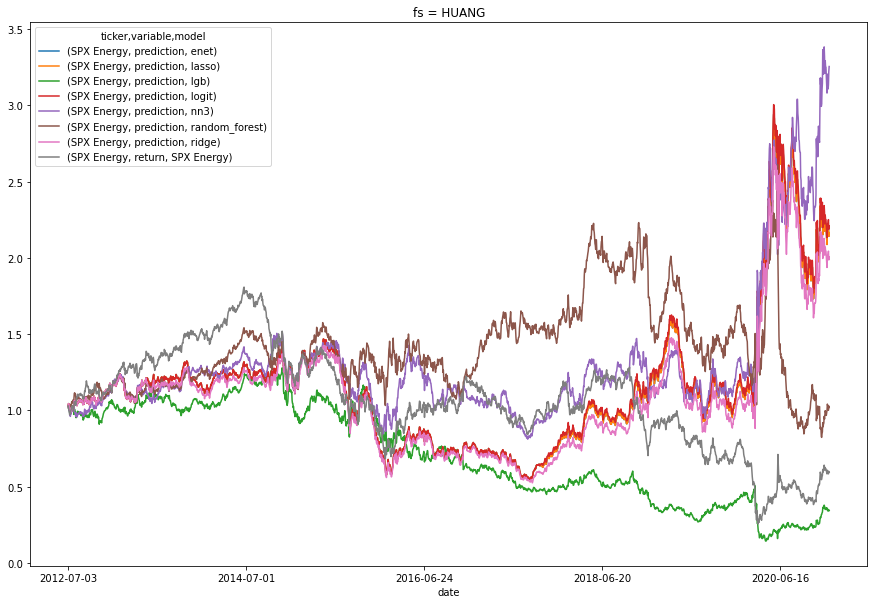

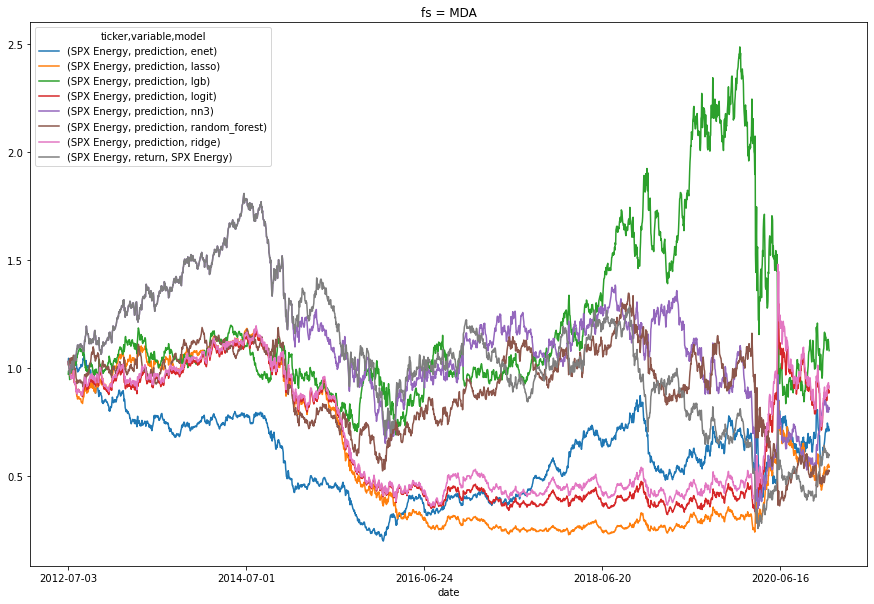

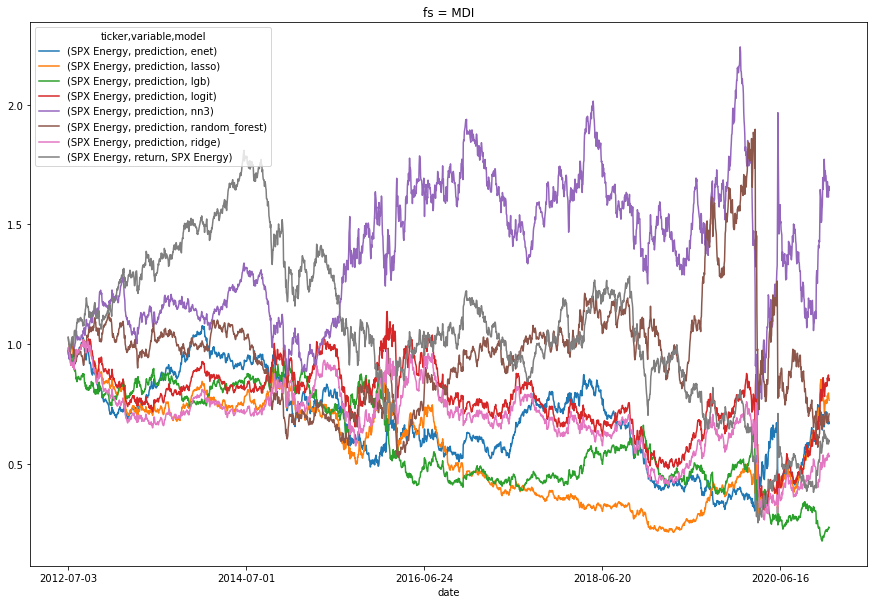

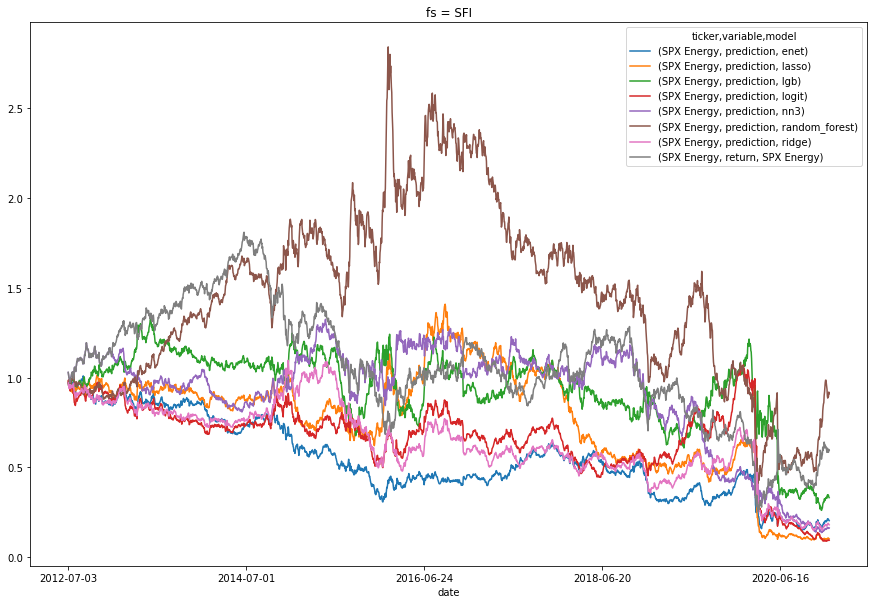

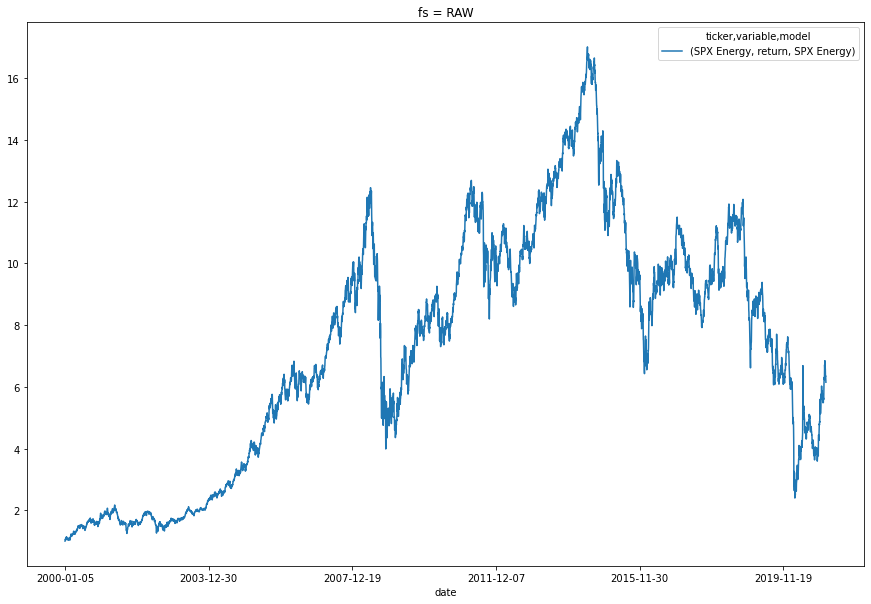

In [53]:
cum_ret_df2 = plot_cum_ret(pred_ret_df=summary_oos_pred_ret_df,
                           benchmark_df=summary_benchmark_df,
                           level_to_subset='fs',
                           show=True)

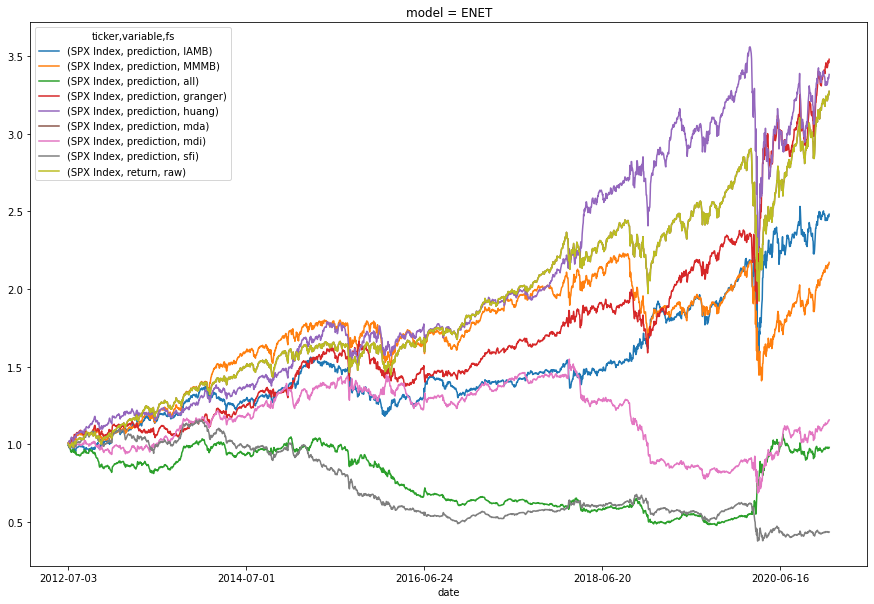

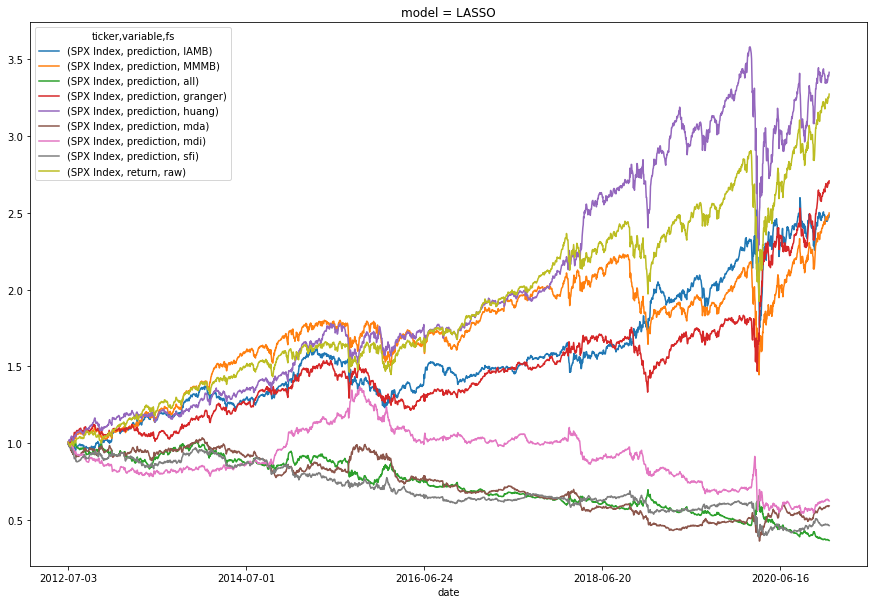

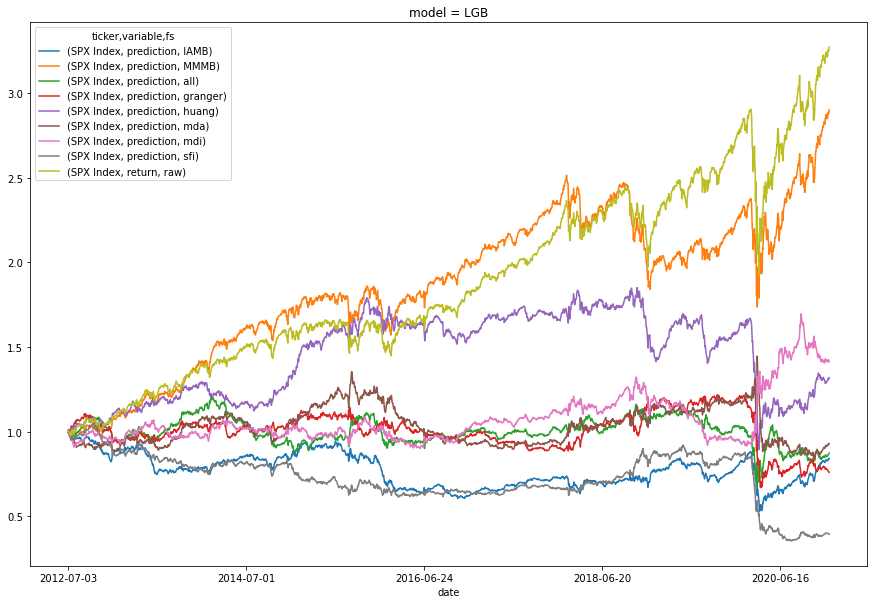

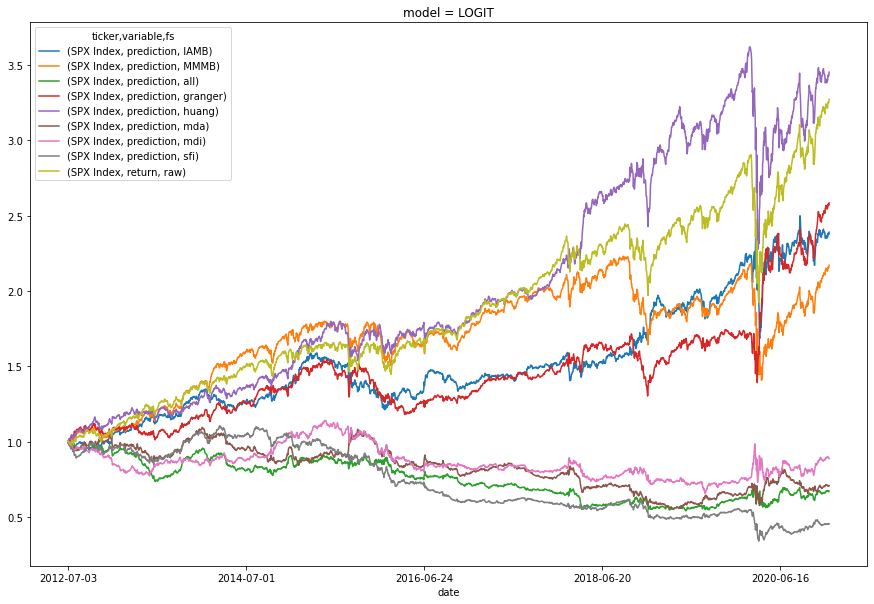

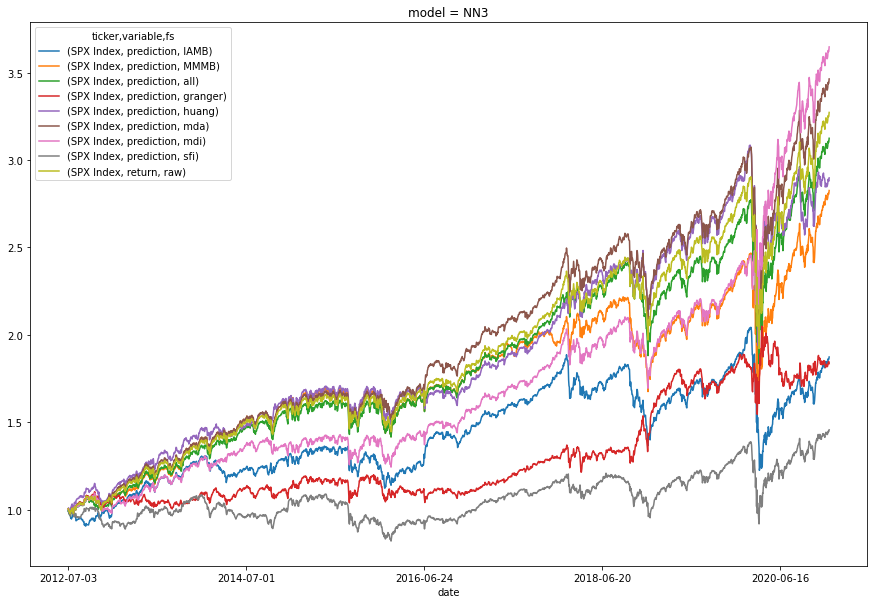

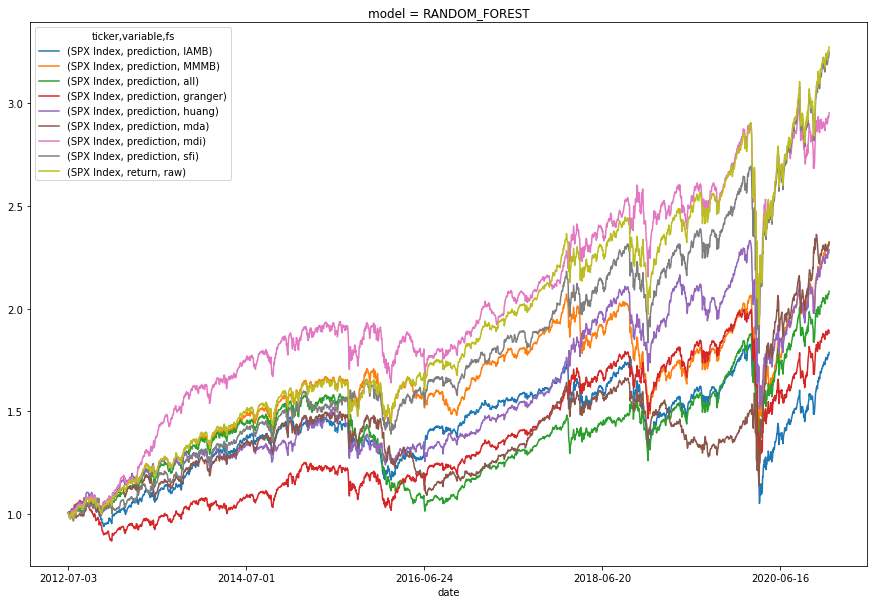

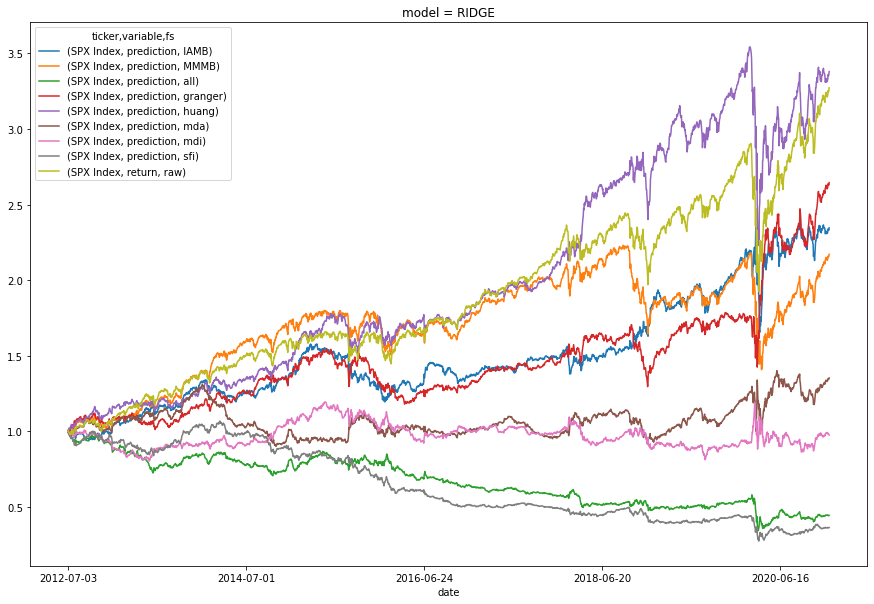

In [14]:
cum_ret_df2 = plot_cum_ret(pred_ret_df=summary_oos_pred_ret_df,
                           benchmark_df=summary_benchmark_df,
                           level_to_subset='model',
                           show=True)

# Sharpe ratio

In [15]:
ret_all_df = pd.concat([oos_pred_ret_df, benchmark_df], axis=0)
pivot_ret_all_df = ret_all_df.pivot_table(index=['date'], columns=['variable', 'ticker', 'model', 'fs'], values=['value'])

In [42]:
sr_rank_df, sr_tb_df, sr_agg_df = sharpe_ratio_tb(returns_df=ret_all_df.dropna(),
                                                  level_to_subset='fs',
                                                  rf=.0)

In [43]:
sr_rank_df.reset_index().groupby(['fs'], as_index=False).median().sort_values('sharpe ratio', ascending=False)

,fs,sharpe ratio
1,MMMB,0.626325
4,huang,0.607429
7,raw,0.603661
0,IAMB,0.460905
3,granger,0.390250
6,mdi,0.318944
5,mda,0.153023
2,all,0.148698
8,sfi,0.097160


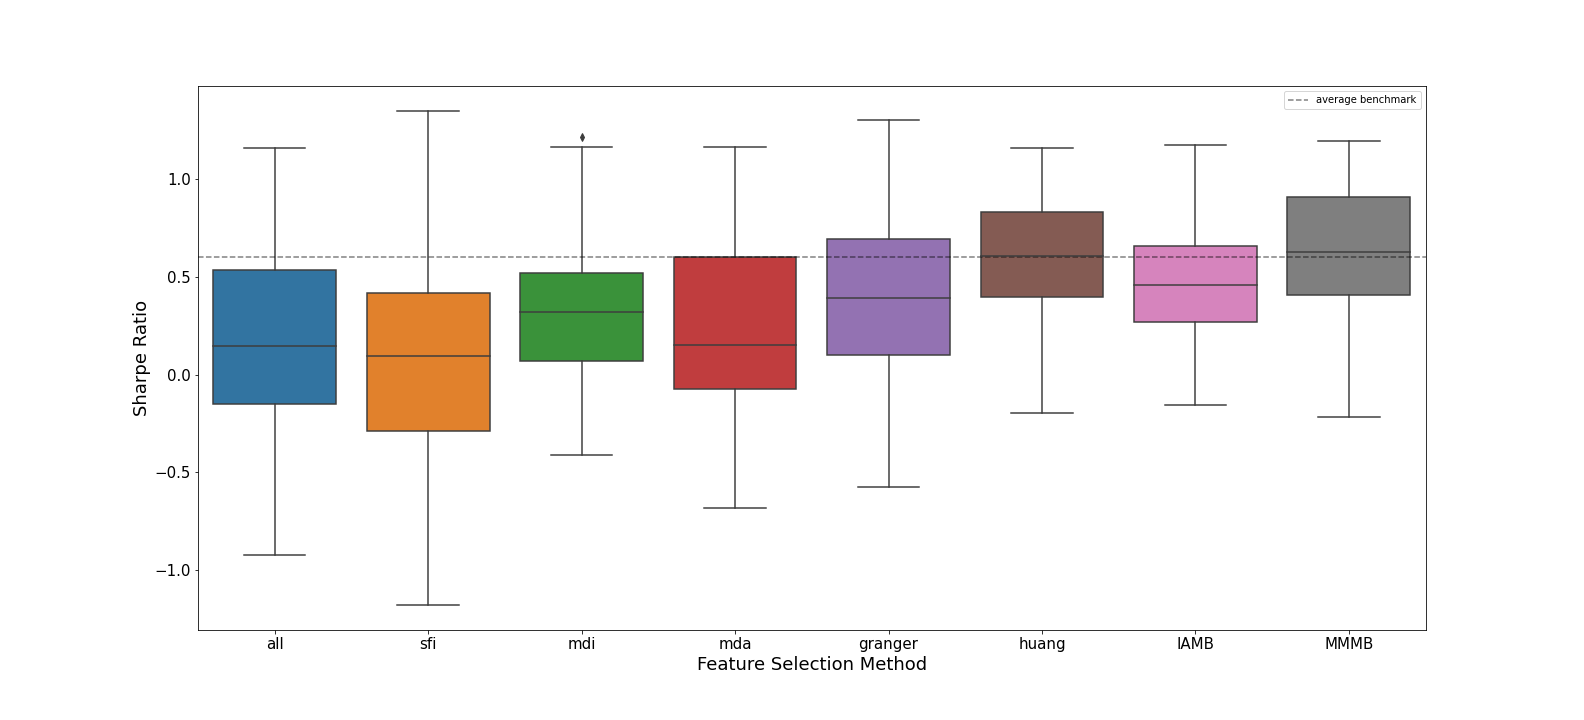

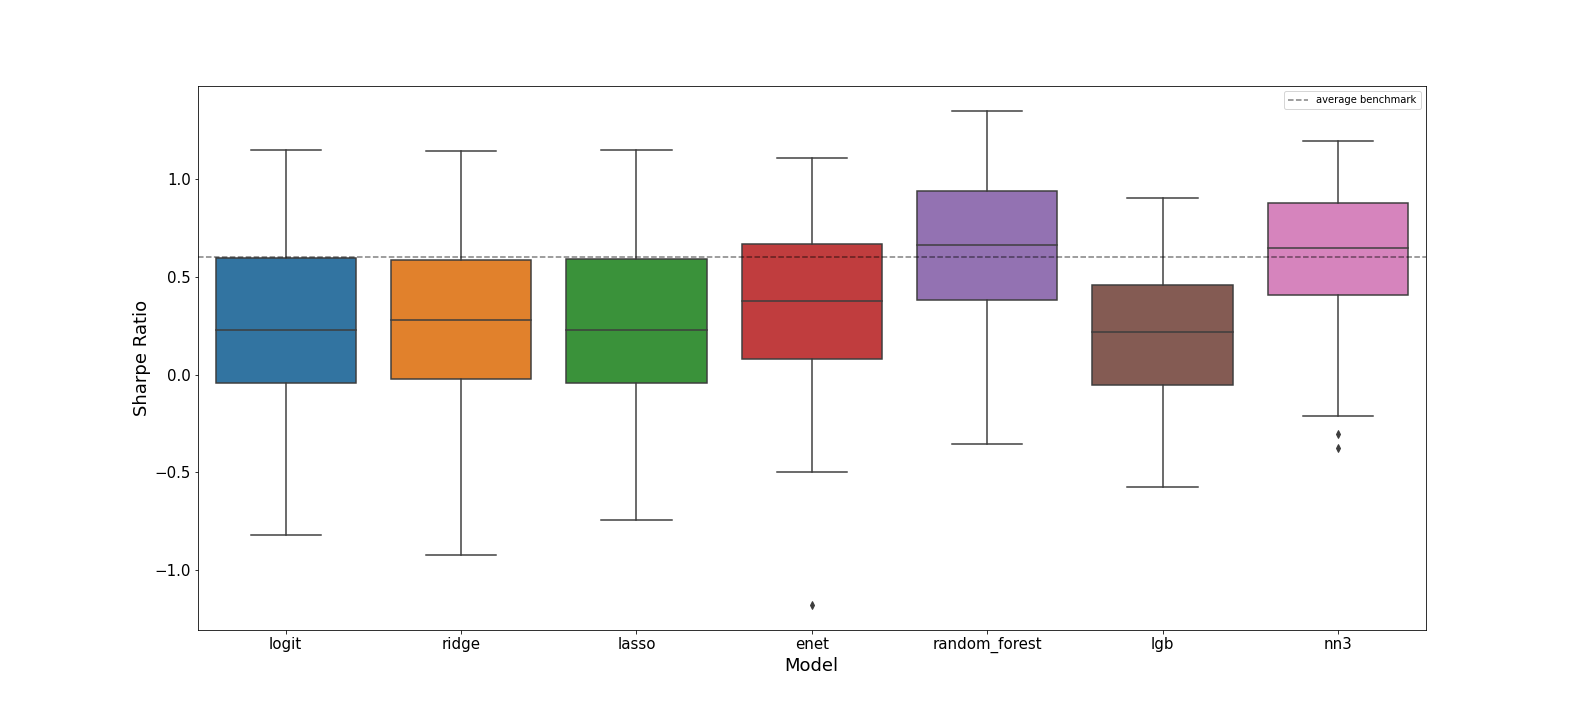

In [44]:
spx_sr_rank_df = sr_rank_df.reset_index()
spx_sr_rank_df = spx_sr_rank_df.loc[spx_sr_rank_df['ticker']=='SPX Index']
spx_sr_rank_df.set_index(['ticker', 'variable', 'model', 'fs'], inplace=True)
spx_sr_rank_df.sort_values('sharpe ratio', ascending=False)

sharpe ratio
ticker    variable   model         fs                   
SPX Index prediction nn3           mdi          0.989214
                     enet          granger      0.956343
                     nn3           mda          0.953496
                     logit         huang        0.951097
                     lasso         huang        0.943375
                     enet          huang        0.936578
                     ridge         huang        0.936155
                     enet          mda          0.913600
                     random_forest sfi          0.907838
                     nn3           all          0.881180
                     random_forest mdi          0.841308
                     lgb           MMMB         0.829097
                     nn3           huang        0.828500
                                   MMMB         0.810751
                     lasso         granger      0.780495
                     ridge         granger      0.764282
                     logit         granger      0.747881
                     lasso         MMMB         0.724469
                                   IAMB         0.720636
                     enet          IAMB         0.719563
                     logit         IAMB         0.693372
                     ridge         IAMB         0.680392
                     random_forest MMMB         0.674216
                                   mda          0.673267
                                   huang        0.662772
                     logit         MMMB         0.626325
                     ridge         MMMB         0.626325
                     enet          MMMB         0.626325
                     random_forest all          0.597785
                                   granger      0.526700
                     nn3           IAMB         0.523802
                                   granger      0.508983
                     random_forest IAMB         0.490617
          return     SPX Index     raw          0.424331
          prediction nn3           sfi          0.347852
                     lgb           mdi          0.324599
                     ridge         mda          0.295038
                     lgb           huang        0.277246
                     enet          mdi          0.186357
                                   all          0.069235
                     ridge         mdi          0.067063
                     lgb           mda          0.032494
                     logit         mdi          0.002177
                     lgb           all         -0.011069
                                   IAMB        -0.035559
                                   granger     -0.108248
                     logit         mda         -0.155511
                                   all         -0.192418
                     lasso         mdi         -0.244278
                                   mda         -0.282052
                                   sfi         -0.453036
                     logit         sfi         -0.464599
                     ridge         all         -0.481223
                     enet          sfi         -0.496965
                     lgb           sfi         -0.568079
                     lasso         all         -0.618459
                     ridge         sfi         -0.620995

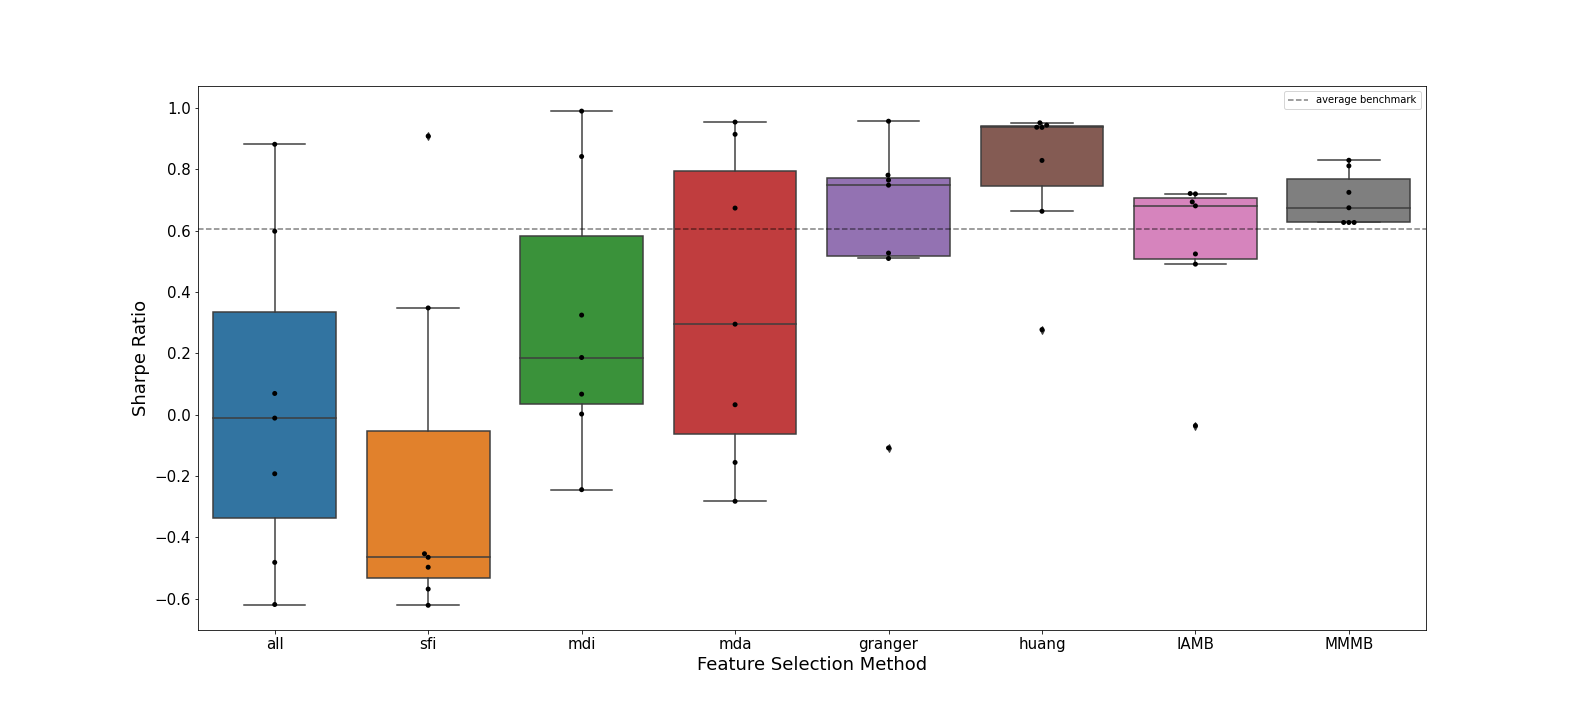

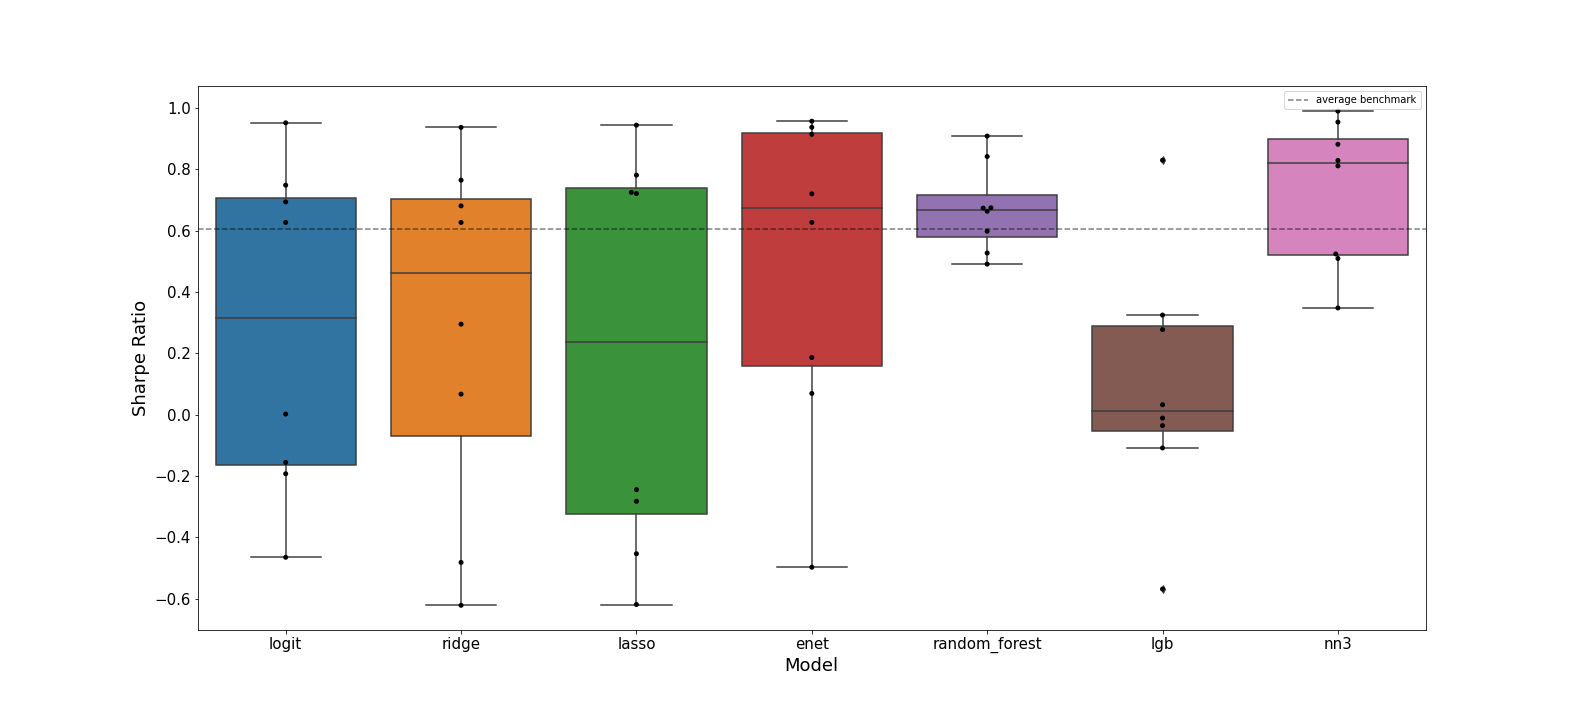

## Maximum drawdown

In [45]:
md_rank_df, md_tb_df, md_agg_df = max_drawdown_tb(pivot_ret_all_df=pivot_ret_all_df.dropna(),
                                                  level_to_subset='fs')

In [46]:
md_rank_df.reset_index().groupby(['fs'], as_index=False).median().sort_values('max drawdown', ascending=False)

,fs,max drawdown
3,granger,-1.192376
7,raw,-1.204663
0,IAMB,-1.210948
1,MMMB,-1.290057
4,huang,-1.321615
6,mdi,-1.367139
8,sfi,-1.422411
5,mda,-1.480552
2,all,-1.760075


In [56]:
spx_md_rank_df = md_rank_df.reset_index()
spx_md_rank_df = spx_md_rank_df.loc[spx_md_rank_df['ticker']=='SPX Index']
spx_md_rank_df.set_index(['ticker', 'variable', 'model', 'fs'], inplace=True)
spx_md_rank_df.sort_values('max drawdown', ascending=False)

max drawdown
ticker    variable   model         fs                   
SPX Index prediction nn3           all         -1.000010
                     random_forest sfi         -1.000021
                     enet          mdi         -1.000047
                     nn3           sfi         -1.000076
                     random_forest IAMB        -1.000111
                                   mda         -1.000114
          return     SPX Index     raw         -1.000114
          prediction random_forest MMMB        -1.000114
                     nn3           MMMB        -1.000114
                                   mdi         -1.000114
                                   mda         -1.000114
                     lgb           MMMB        -1.000114
                     enet          mda         -1.000114
                     lasso         IAMB        -1.000154
                     enet          IAMB        -1.000154
                     ridge         IAMB        -1.000154
                     logit         IAMB        -1.000154
                     ridge         mda         -1.000182
                     nn3           granger     -1.000182
                     random_forest mdi         -1.000253
                                   granger     -1.000364
                                   all         -1.000413
                                   huang       -1.000625
                     nn3           huang       -1.001024
                     logit         MMMB        -1.001422
                     enet          MMMB        -1.001422
                     ridge         MMMB        -1.001422
                     lasso         MMMB        -1.001422
                     ridge         huang       -1.001542
                     lasso         huang       -1.001542
                     logit         huang       -1.001542
                     enet          huang       -1.003372
                     lasso         mda         -1.004360
                     enet          all         -1.004772
                     lgb           mdi         -1.005898
                     logit         sfi         -1.007418
                     ridge         sfi         -1.007418
                     lgb           IAMB        -1.008004
                                   sfi         -1.008397
                     nn3           IAMB        -1.009013
                     logit         granger     -1.009277
                     ridge         granger     -1.009277
                     lasso         granger     -1.009277
                     enet          granger     -1.009277
                                   sfi         -1.009538
                     lgb           mda         -1.010269
                     lasso         sfi         -1.013841
                     ridge         all         -1.041089
                     lgb           granger     -1.059104
                     logit         mda         -1.076484
                     lgb           all         -1.083841
                     logit         all         -1.130131
                     lasso         mdi         -1.157594
                     ridge         mdi         -1.218839
                     logit         mdi         -1.228659
                     lgb           huang       -1.434509
                     lasso         all         -1.802750

## Probability of Backtest Overfitting (PBO) Bailey et al. (2013)